# Predicting Boston's house pricing

### Final Project - Junior Peña

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
%matplotlib inline

In [3]:
#import the csv file
boston = pd.read_csv('C:\\Users\\junio\\Downloads\\Boston-house-pricing.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
#Verify the shape of the document
boston.shape

(506, 14)

In [5]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Preprocessing

In [8]:
#Check null values
boston.isnull().sum()

CRIM        0
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

As we can see there are several null values in multiple columns. Let's fix that and replace then with the mean value in each column

In [9]:
boston['CRIM'].fillna((boston['CRIM'].mean()), inplace=True)
boston['ZN'].fillna((boston['ZN'].mean()), inplace=True)
boston['INDUS'].fillna((boston['INDUS'].mean()), inplace=True)
boston['CHAS'].fillna((boston['CHAS'].mean()), inplace=True)
boston['AGE'].fillna((boston['AGE'].mean()), inplace=True)
boston['LSTAT'].fillna((boston['LSTAT'].mean()), inplace=True)

In [10]:
#Check null values again
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Data Analysis

The target variable is MEDV, so we need to verify the outliers. For this we can plot the distribution as following.

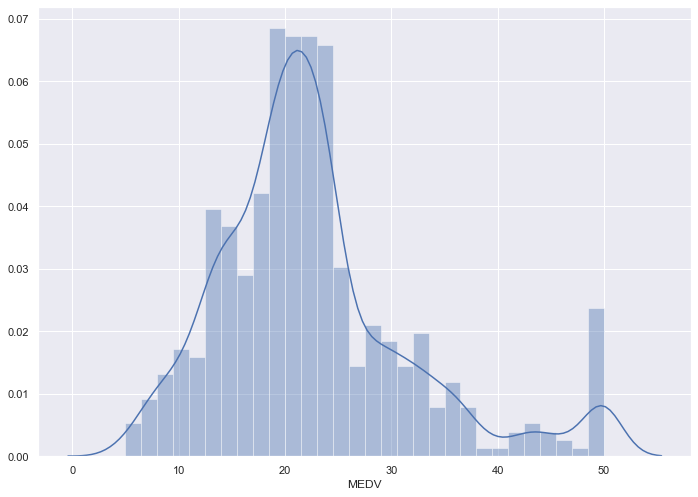

In [12]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.distplot(boston['MEDV'], bins=30)
plt.show()

As we can see, the target variable MEDV has values distributed normally and with few outliers.

Now, we should se the relation between all variables with a correlation matrix. This will help us to confirm which variables affect the house pricing the most.

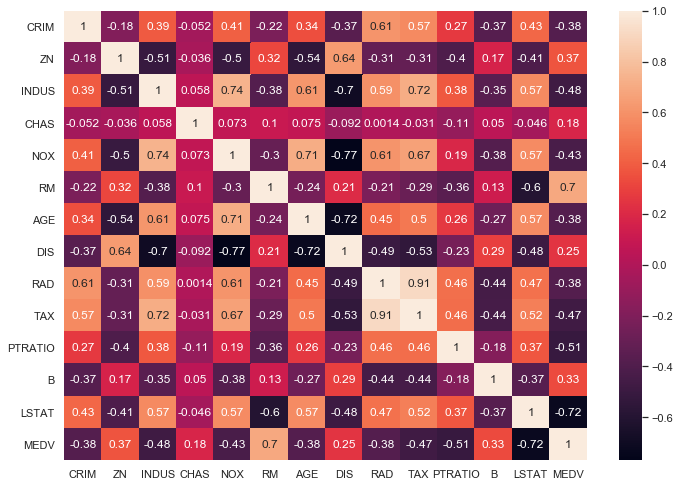

In [19]:
sb.heatmap(boston.corr(), annot = True)

The variables of RM, LSTAT, INDUS and TAX are the ones with the highest correlation to the target MEDV, so these will be our features in the prediction.

In [173]:
#Divide the features and target variable
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['INDUS'], boston['TAX']], columns = ['LSTAT','RM', 'INDUS', 'TAX'])
Y = boston['MEDV']

### Splitting the data

In [174]:
#Generating train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 4)
(102, 4)
(404,)
(102,)


### Training, Testing and Evaluation

In [175]:
#define model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
#Predicting test set results
Y_pred = regressor.predict(X_test)
Y_pred

array([38.19659655, 21.92846166, 24.64045664, 30.9929073 , 25.71430457,
       23.36309373, 18.35668585,  8.32833807, 24.70177335, 13.08505513,
       12.34126434, 30.00229674, 33.14884715, 26.44337622,  9.12444531,
        9.44255233, 21.90187702, 16.60106945, 16.87190016, 25.39518677,
       30.70171235, 34.34497747, 26.02199998, 23.02765452, 11.97948217,
       28.22345533, 18.70238813, 16.47411378, 23.61549181, 22.35573561,
       19.68687764, 33.10283238, 20.22970973, 24.53689898, 18.79289364,
       22.62554843, 25.69444242, 33.15464466, 22.5612236 , 27.18829336,
       17.70932792,  7.43361948, 18.8466464 , 19.21491712, 21.01131782,
       28.0457256 , 21.48999265, 12.93213524, 29.04000533, 21.66954336,
       26.7881624 , 23.31667402, 36.73841488, 18.96457036, 20.55089332,
        7.78107329, 35.60782203, 18.32401683, 29.78279492, 22.99057226,
       20.63665669, 21.98618557, 31.86370153, 31.22478401, 21.81652721,
       22.96212203, 33.30852509, 24.44710285, 29.78113559, 27.62

In [177]:
#Calculating coefficients
print(regressor.coef_)

[-0.5232459   5.21281587 -0.03455125 -0.00624988]


In [178]:
#calculating the intercept
print(regressor.intercept_)

-0.5933718401834085


In [183]:
#Calculating r squared value
from sklearn.metrics import r2_score
print('The r2 score of the model is:',r2_score(Y_test, Y_pred))

The r2 score of the model is: 0.7165154344037021


## Conclusion

As we can see the variables of RM, LSTAT, INDUS and TAX are the most efficient in order to predict the Boston house pricing.